# Vibração Forçada com dois graus de liberdade

Vamos resolver o problema de vibração forçada com 2 GL usando a matriz de impedância mecânica.

A solução é completamente genérica para qualquer problema com 2 GL.

##  Setup

In [1]:
import sympy as sp
from sympy import I
from sympy.abc import t

## Sistema mecânico
Vamos definir o sistema mecânico com as matrizes de massa, rigidez e amortecimento.

In [2]:
m = sp.Matrix([[1, 0],
               [0, 2]])
c = sp.Matrix([[0.2, 0],
               [0.0, 0.15]])
k = sp.Matrix([[40.0, -40.0],
               [-40.0, 70.0]])

## Força externa

In [3]:
F0 = sp.Matrix([0.0, 5.0])
ωe = 1.0*sp.pi

## Frequências naturais
Apesar de não ser estritamente necessário, sempre é bom calcular as frequências naturais do problema, para ajudar a entender o comportamento.

In [4]:
ω = sp.symbols('ω')
Z0 = k - ω**2 * m
display(Z0)

Matrix([
[40.0 - ω**2,         -40.0],
[      -40.0, 70.0 - 2*ω**2]])

### Equação característica

In [5]:
eqc = sp.det(Z0)
display(eqc)

2*ω**4 - 150.0*ω**2 + 1200.0

In [6]:
roots = sp.solve(eqc, ω)
roots = [ r for r in roots if r > 0]
print(roots)
ω_1 = min(roots)
ω_2 = max(roots)

[3.01752518978693, 8.11754530193712]


## Matriz de impedância mecânica
A matriz de impedância mecânica é

In [7]:
Ziw = k - ω**2*m + I*ω*c
display(Ziw)

Matrix([
[-ω**2 + 0.2*I*ω + 40.0,                     -40.0],
[                 -40.0, -2*ω**2 + 0.15*I*ω + 70.0]])

para a frequência da força externa dada,

In [8]:
Zi = Ziw.subs([(ω, ωe)])
display(sp.N(Zi))

Matrix([
[30.1303955989106 + 0.628318530717959*I,                                  -40.0],
[                                 -40.0, 50.2607911978213 + 0.471238898038469*I]])

## Resolvendo para os deslocamentos

In [9]:
X = sp.N(Zi.LUsolve(F0))
display(X)

Matrix([
[ -1.81307512601305 - 0.96602729329122*I],
[-1.35054244869409 - 0.756149330136679*I]])

## Magnitude e fase

In [10]:
Xmag = sp.Abs(X)
ϕ = sp.N(X.applyfunc(sp.arg))
display(Xmag)
display(ϕ)

Matrix([
[2.05437341881918],
[1.54781352726702]])

Matrix([
[-2.65204168020707],
[-2.63119139049153]])

## Resposta total

Excluindo o transiente é claro.

In [11]:
x_1 = Xmag[0]*sp.cos(ωe*t+ϕ[0])
x_2 = Xmag[1]*sp.cos(ωe*t+ϕ[1])
display(x_1)
display(x_2)

2.05437341881918*cos(1.0*pi*t - 2.65204168020707)

1.54781352726702*cos(1.0*pi*t - 2.63119139049153)

## Resposta na forma gráfica

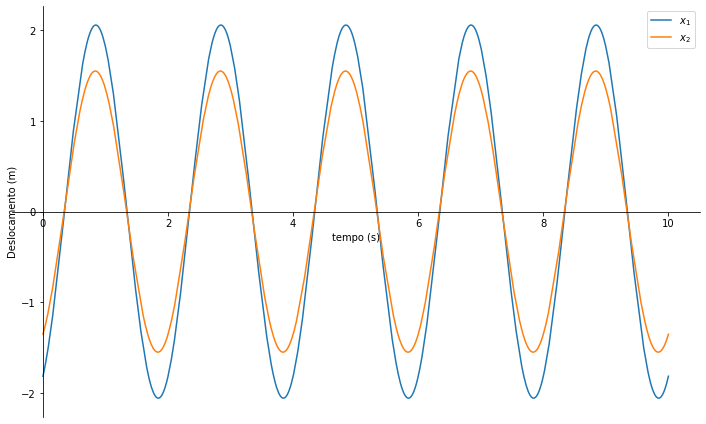

In [21]:
τe = 2*sp.pi/ωe
p1 = sp.plot(x_1, (t, 0, 5*τe), size=(10,6), xlabel="tempo (s)", ylabel="Deslocamento (m)",
             show=False, label=r"$x_1$", legend=True) 
p2 = sp.plot(x_2, (t, 0, 5*τe), show=False, label=r"$x_2$")
p1.extend(p2)
p1.show()